In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow
import os

In [ ]:
FacemodelFile = "/content/drive/MyDrive/SupFiles/res10_300x300_ssd_iter_140000.caffemodel"
#EyeRegionModelFile = "/content/drive/MyDrive/Detectors/cascade1.xml"
#EyeRegionModelFile = "/content/drive/MyDrive/Detectors/cascade2.xml"
EyeRegionModelFile = "/content/drive/MyDrive/Detectors/cascade3.xml"
configFile = "/content/drive/MyDrive/SupFiles/deploy.prototxt.txt"

In [ ]:
net = cv2.dnn.readNetFromCaffe(configFile, FacemodelFile)
eyePatchModel = cv2.CascadeClassifier(EyeRegionModelFile)

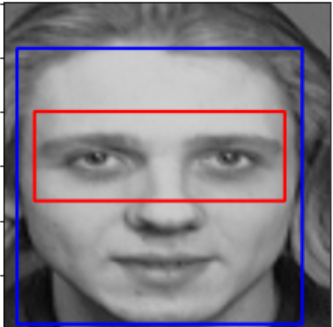



*   Patch1: Eye region 
*   Patch 2: Eye region + forehead 
*   Patch 3: Nose
*   Patch 4: Eye region and nose  
*   Patch 5: Jaw region and mouth
*   Patch 6: From eye region to the chin
*   Patch 7: Nose and cheeks to chin.
*   Patch 8: Left half of the face.
*   Patch 9: Right half of the face 


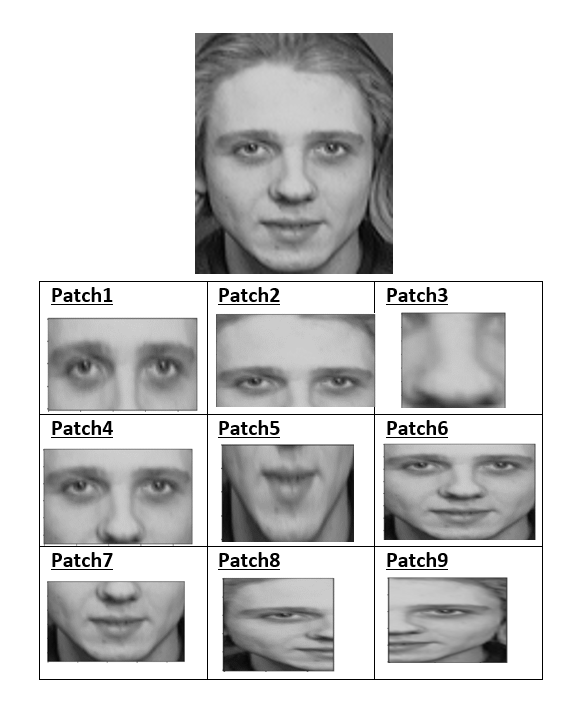

In [ ]:
def extractEyePatch(img, faceX, faceY, faceW, faceH, eyeX, eyeY, eyeW, eyeH):
  eyePatch = img[eyeY:eyeY+eyeH, eyeX:eyeX+eyeW]
  plt.imshow(eyePatch, cmap='gray')
  plt.show()
  
  return cv2.resize(eyePatch, (100, 100))


In [ ]:
def extractEyeAndForeheadPatch(img, faceX, faceY, faceW, faceH, eyeX, eyeY, eyeW, eyeH):
  EyeAndForeheadPatch = img[faceY:eyeY+eyeH, eyeX:eyeX+eyeW]
  plt.imshow(EyeAndForeheadPatch, cmap='gray')
  plt.show()
  
  return cv2.resize(EyeAndForeheadPatch, (100, 100))

In [ ]:
def extractEyeCheeksAndNosePatch(img, faceX, faceY, faceW, faceH, eyeX, eyeY, eyeW, eyeH, noseBottom):
  patchECN =  img[eyeY:noseBottom, eyeX:eyeX+eyeW]
  plt.imshow(patchECN, cmap='gray')
  plt.show()
    
  return cv2.resize(patchECN, (100, 100))

In [ ]:
def extractNose(img, faceX, faceY, faceW, faceH, eyeX, eyeY, eyeW, eyeH):
  noseX = (int)(eyeX + eyeW/2) - 30
  noseY = (int)(eyeY + eyeH/2)
  noseH = 70
  noseW = 70
  nosePatch = img[noseY:noseY+noseH, noseX:noseX+noseW]
  plt.imshow(nosePatch, cmap='gray')
  plt.show()
  return cv2.resize(nosePatch, (100, 100)), (noseY+noseH)

In [ ]:
def extractMouth(img, faceX, faceY, faceW, faceH, eyeX, eyeY, eyeW, eyeH, noseBottom):
  patchM =  img[noseBottom:faceH, eyeX:eyeX+eyeW]
  plt.imshow(patchM, cmap='gray')
  plt.show()
  return cv2.resize(patchM, (100, 100))

In [ ]:
def extractEyeToChin(img, faceX, faceY, faceW, faceH, eyeX, eyeY, eyeW, eyeH):
  eyeChinPatch = img[eyeY:faceH, eyeX:eyeX+eyeW]
  plt.imshow(eyeChinPatch, cmap='gray')
  plt.show()
  
  return cv2.resize(eyeChinPatch, (100, 100))

In [ ]:
def extractNoseToChin(img, faceX, faceY, faceW, faceH, eyeX, eyeY, eyeW, eyeH):
  noseChinPatch = img[eyeY+eyeH:faceH, eyeX:eyeX+eyeW]
  plt.imshow(noseChinPatch, cmap='gray')
  plt.show()
  
  return cv2.resize(noseChinPatch, (100, 100))

In [ ]:
def extractLeftHalf(img, faceX, faceY, faceW, faceH, eyeX, eyeY, eyeW, eyeH):
  leftHalfPatch = img[faceY:faceH, faceX:((int)(eyeX + (eyeW/2)))]
  plt.imshow(leftHalfPatch, cmap='gray')
  plt.show()
  
  return cv2.resize(leftHalfPatch, (100, 100))

In [ ]:
def extractRightHalf(img, faceX, faceY, faceW, faceH, eyeX, eyeY, eyeW, eyeH):
  rightHalfPatch = img[faceY:faceH, ((int)(eyeX + (eyeW/2))):faceW]
  plt.imshow(rightHalfPatch, cmap='gray')
  plt.show()
  
  return cv2.resize(rightHalfPatch, (100, 100))

In [ ]:
def getAndStorePatches(img, imgName, person):
  h, w = img.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0,(300, 300), (104.0, 117.0, 123.0))
  net.setInput(blob)
  faces = net.forward()#to draw faces on image
  for i in range(faces.shape[2]):
    confidence = faces[0, 0, i, 2]
    if confidence > 0.5:
      box = faces[0, 0, i, 3:7] * np.array([w, h, w, h])
      (x, y, x1, y1) = box.astype("int") 
      if not( x1>300 or y1>300):
        #cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
        eyePatches = eyePatchModel.detectMultiScale(img, 1.3, 5)
        countIndex = 0
        maxWidthIndex = 0
        maxWidth = 0
        for (xE, yE, wE, hE) in eyePatches:
          if wE > maxWidth:
            maxWidth = wE
            maxWidthIndex = countIndex
          countIndex = countIndex + 1
        #img = cv2.rectangle(img, (eyePatches[maxWidthIndex][0], eyePatches[maxWidthIndex][1]), (eyePatches[maxWidthIndex][0]+eyePatches[maxWidthIndex][2], eyePatches[maxWidthIndex][1]+eyePatches[maxWidthIndex][3]), (255,0,0), 2)
        #print(eyePatches[maxWidthIndex])
        xE= eyePatches[maxWidthIndex][0]
        yE= eyePatches[maxWidthIndex][1]
        wE= eyePatches[maxWidthIndex][2]
        hE= eyePatches[maxWidthIndex][3]

        eyePatch = extractEyePatch(img, x, y, x1, y1, xE, yE, wE, hE)
        eyeAndForeheadPatch = extractEyeAndForeheadPatch(img, x, y, x1, y1, xE, yE, wE, hE)
        nosePatch, noseBottom = extractNose(img, x, y, x1, y1, xE, yE, wE, hE)
        eyeCheeksAndNosePatch = extractEyeCheeksAndNosePatch(img, x, y, x1, y1, xE, yE, wE, hE, noseBottom)
        mouth = extractMouth(img, x, y, x1, y1, xE, yE, wE, hE, noseBottom)
        eyeToChinPatch = extractEyeToChin(img, x, y, x1, y1, xE, yE, wE, hE)
        noseToChinPatch = extractNoseToChin(img, x, y, x1, y1, xE, yE, wE, hE)
        leftHalfPatch = extractLeftHalf(img, x, y, x1, y1, xE, yE, wE, hE)
        rightHalfPatch = extractRightHalf(img, x, y, x1, y1, xE, yE, wE, hE)

        directoryEyeP = "/content/drive/MyDrive/data/facesTrimmed/TrainingEyes/"+person+"/"
        directoryEyeAndForehead = "/content/drive/MyDrive/data/facesTrimmed/TrainingEyeForehead/"+person+"/"
        directoryEyesNose = "/content/drive/MyDrive/data/facesTrimmed/TrainingEyesNose/"+person+"/"
        directoryNose = "/content/drive/MyDrive/data/facesTrimmed/TrainingNose/"+person+"/"
        directoryJaw = "/content/drive/MyDrive/data/facesTrimmed/TrainingJaw/"+person+"/"
        directoryEyeToChin = "/content/drive/MyDrive/data/facesTrimmed/TrainingEyeToChin/"+person+"/"
        directoryNoseToChin = "/content/drive/MyDrive/data/facesTrimmed/TrainingNoseMouth/"+person+"/"
        directoryLeftHalf = "/content/drive/MyDrive/data/facesTrimmed/TrainingLeftHalf/"+person+"/"
        directoryRightHalf = "/content/drive/MyDrive/data/facesTrimmed/TrainingRightHalf/"+person+"/"

        '''
        os.chdir(directoryEyeP) 
        cv2.imwrite(imageName, eyePatch)

        os.chdir(directoryEyeAndForehead) 
        cv2.imwrite(imageName, eyeAndForeheadPatch)

        os.chdir(directoryEyesNose) 
        cv2.imwrite(imageName, eyeCheeksAndNosePatch)

        os.chdir(directoryNose) 
        cv2.imwrite(imageName, nosePatch)

        os.chdir(directoryJaw) 
        cv2.imwrite(imageName, mouth)
        
        os.chdir(directoryEyeToChin) 
        cv2.imwrite(imageName, eyeToChinPatch)

        os.chdir(directoryNoseToChin) 
        cv2.imwrite(imageName, noseToChinPatch)

        os.chdir(directoryLeftHalf) 
        cv2.imwrite(imageName, leftHalfPatch)

        os.chdir(directoryRightHalf) 
        cv2.imwrite(imageName, rightHalfPatch)
        '''


/content/drive/MyDrive/data/facesTrimmed/Training/s38/2.png


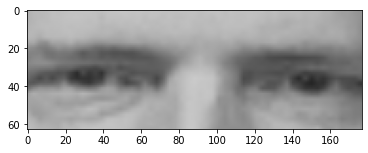

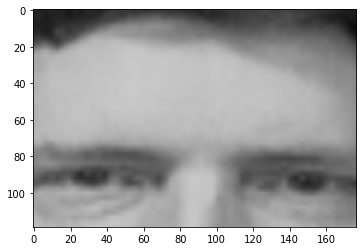

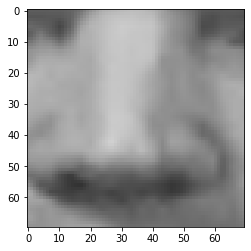

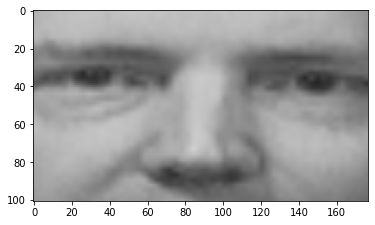

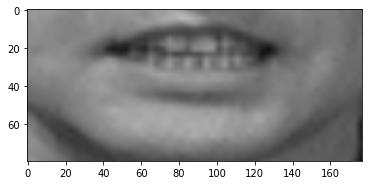

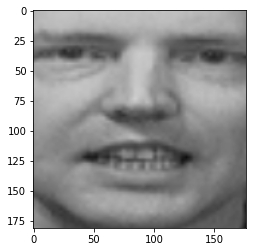

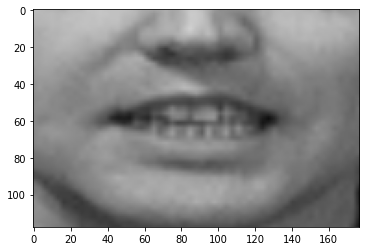

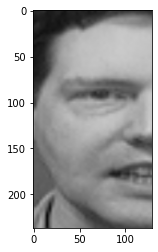

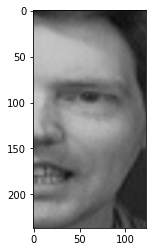

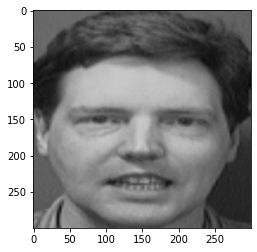

/content/drive/MyDrive/data/facesTrimmed/Training/s38/4.png


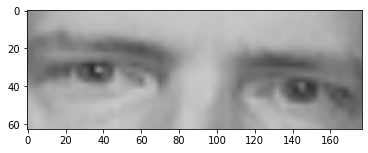

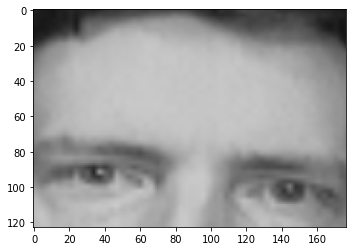

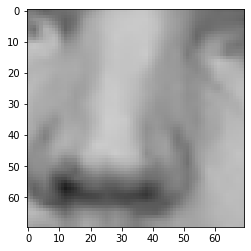

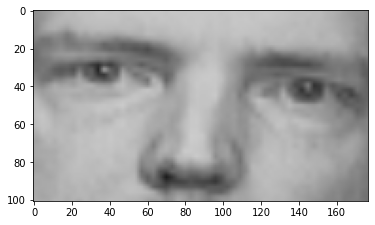

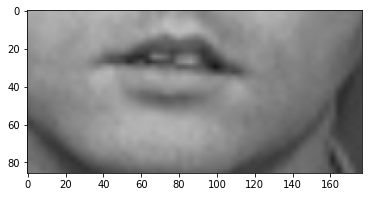

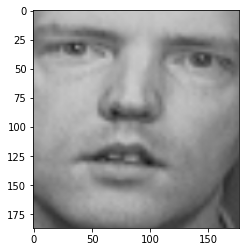

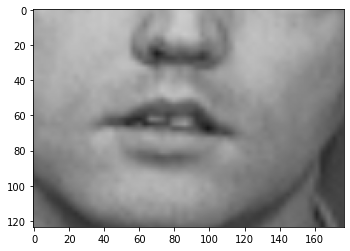

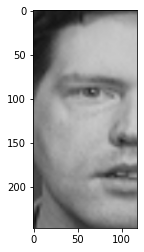

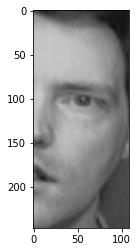

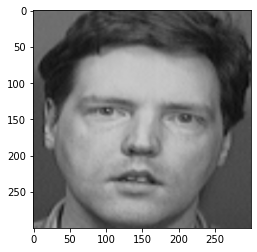

/content/drive/MyDrive/data/facesTrimmed/Training/s38/9.png


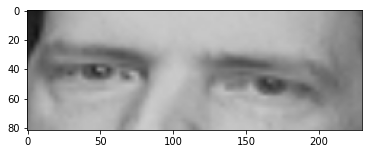

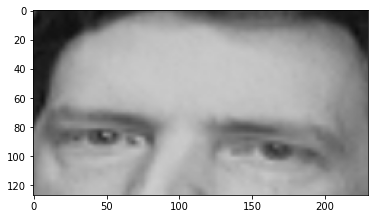

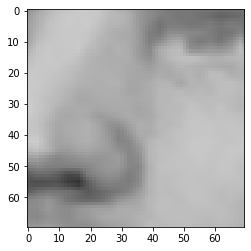

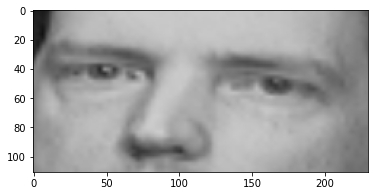

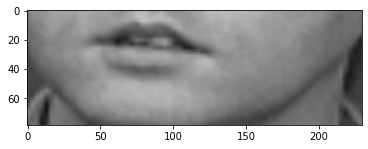

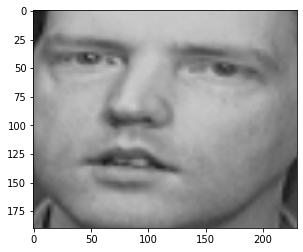

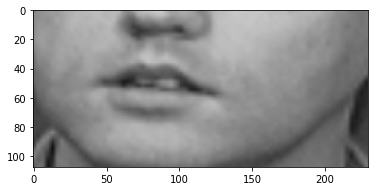

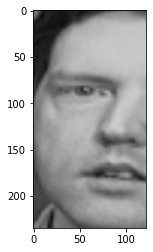

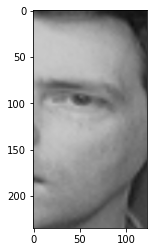

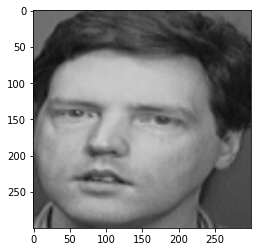

/content/drive/MyDrive/data/facesTrimmed/Training/s38/10.png


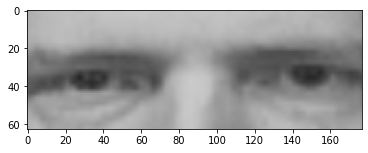

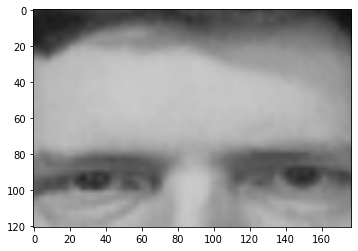

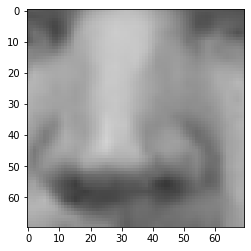

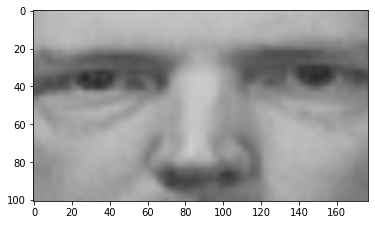

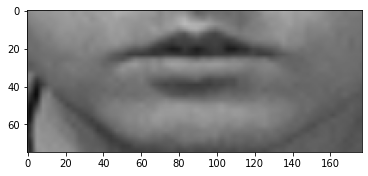

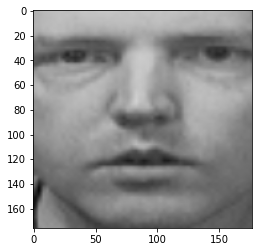

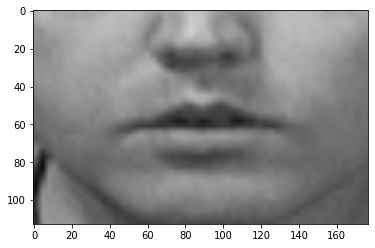

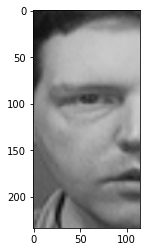

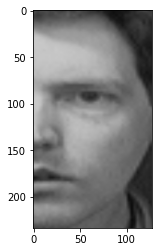

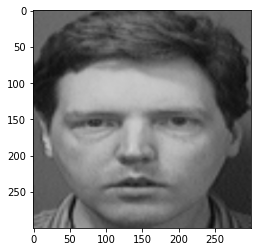

/content/drive/MyDrive/data/facesTrimmed/Training/s38/5.png


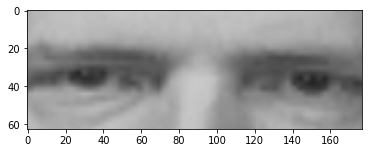

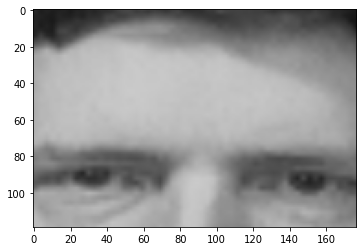

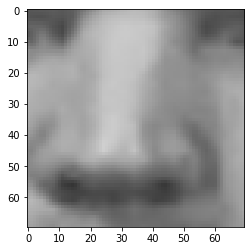

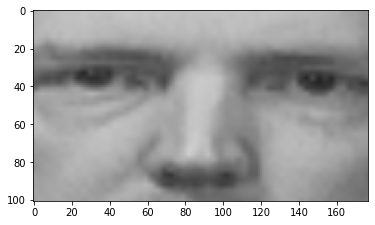

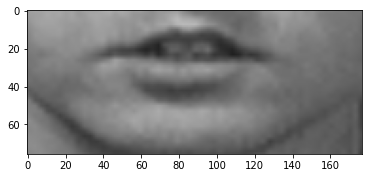

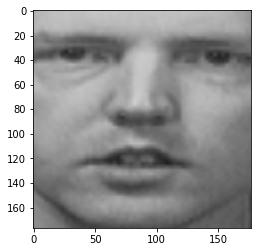

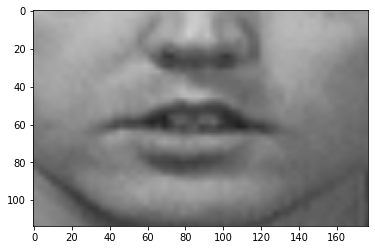

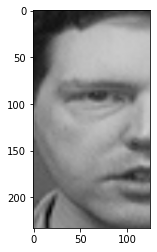

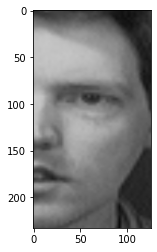

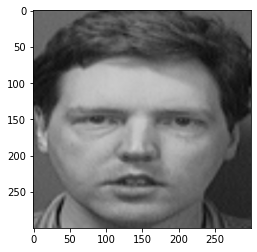

/content/drive/MyDrive/data/facesTrimmed/Training/s38/8.png


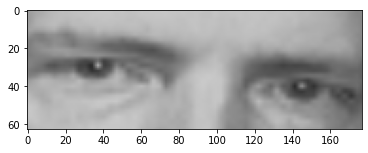

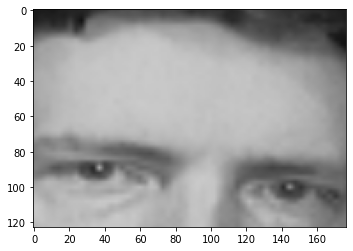

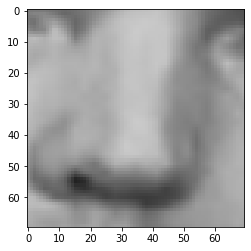

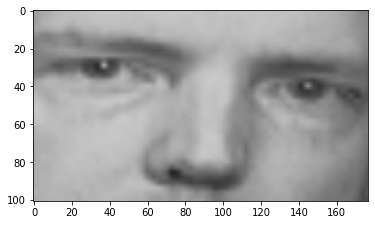

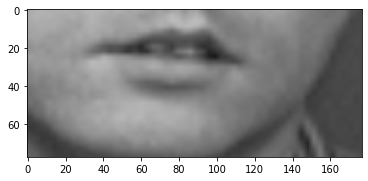

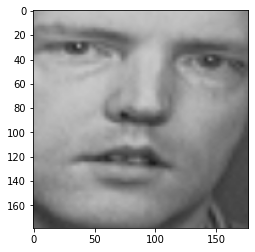

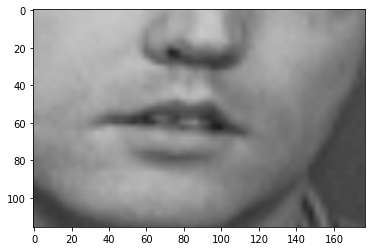

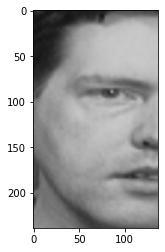

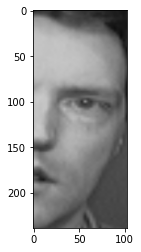

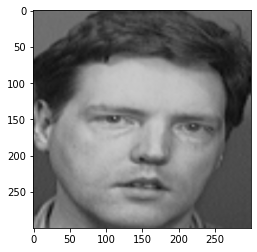

/content/drive/MyDrive/data/facesTrimmed/Training/s38/1.png


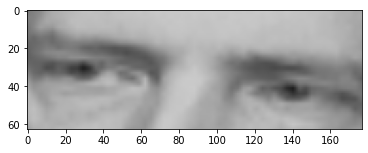

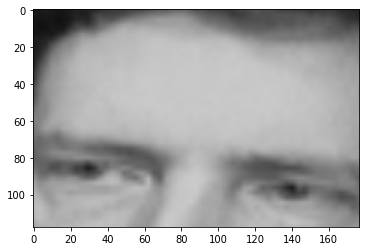

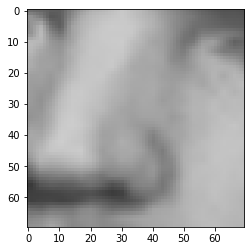

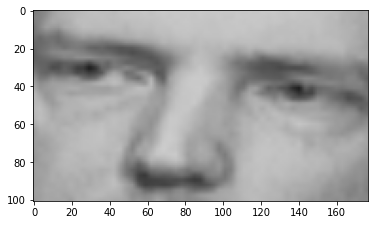

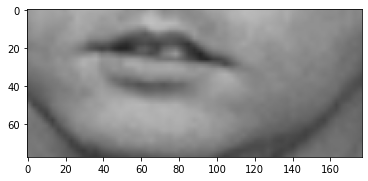

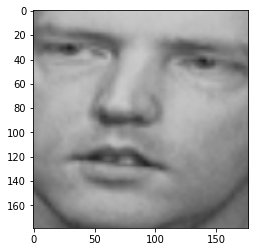

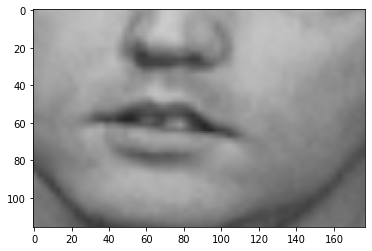

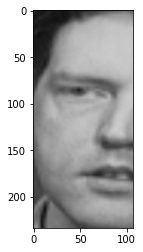

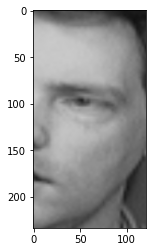

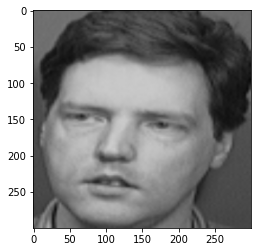

/content/drive/MyDrive/data/facesTrimmed/Training/s38/7.png


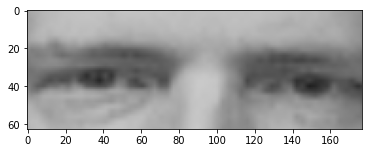

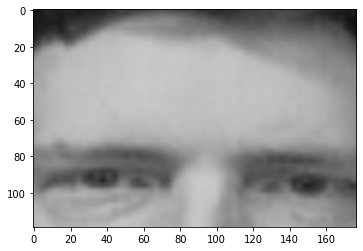

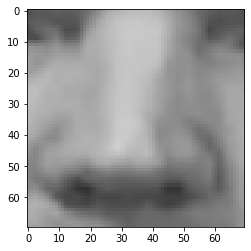

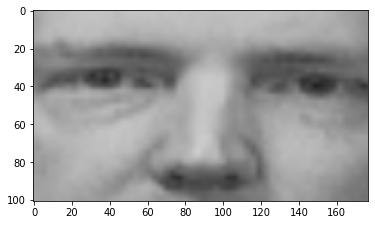

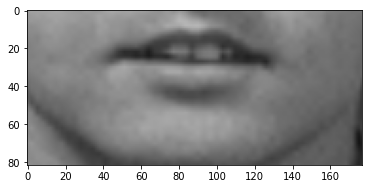

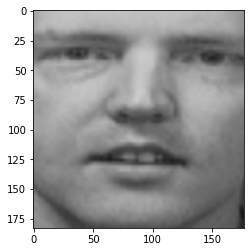

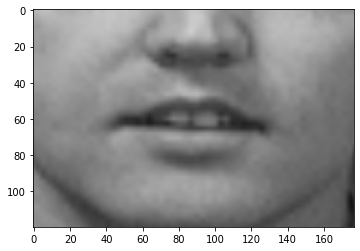

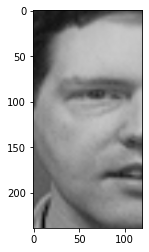

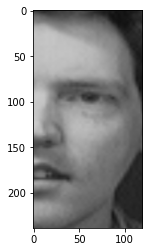

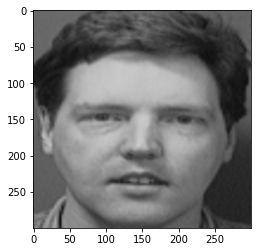

/content/drive/MyDrive/data/facesTrimmed/Training/s38/3.png


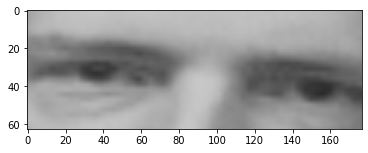

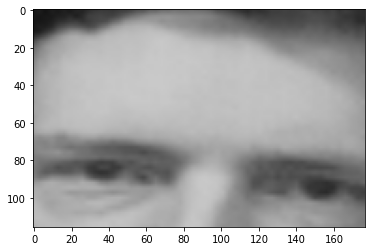

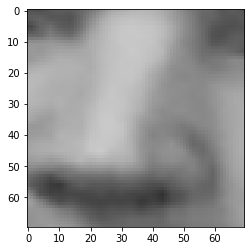

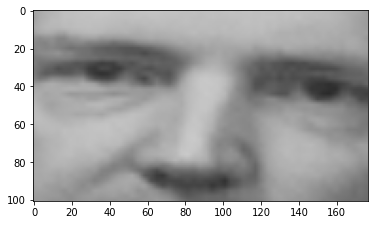

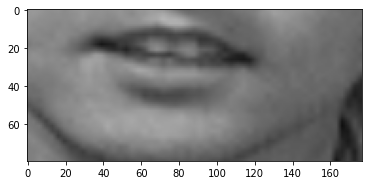

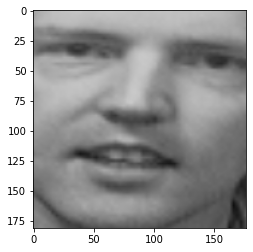

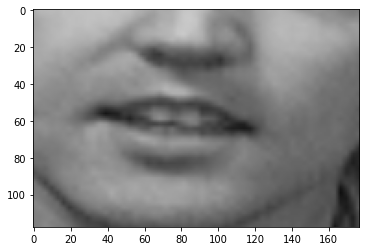

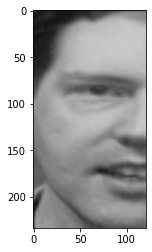

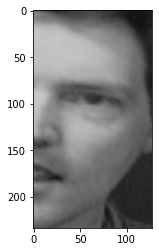

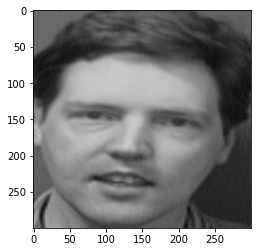

/content/drive/MyDrive/data/facesTrimmed/Training/s38/6.png


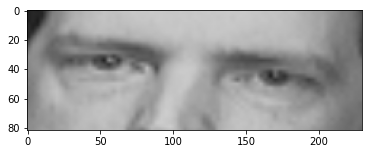

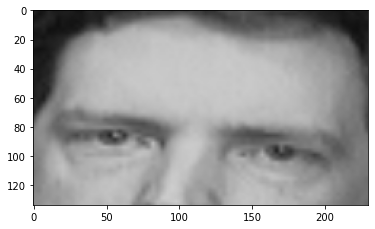

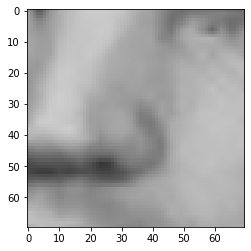

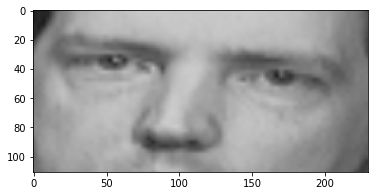

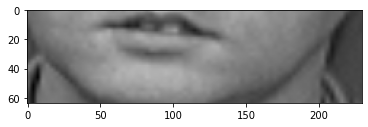

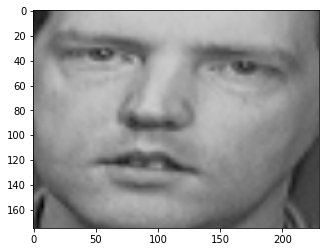

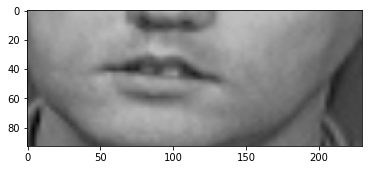

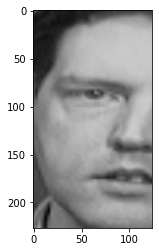

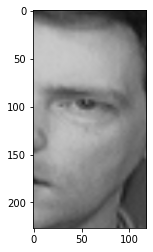

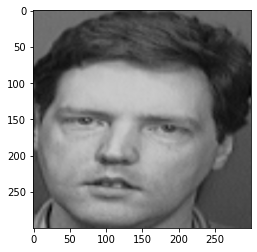

/content/drive/MyDrive/data/facesTrimmed/Training/s39/2.png


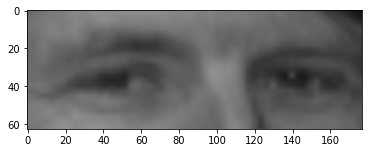

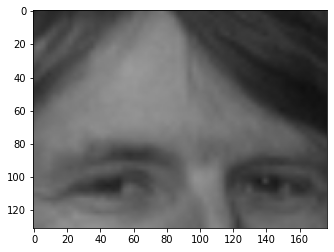

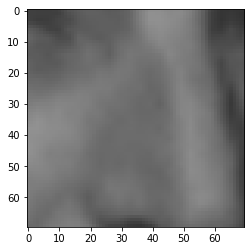

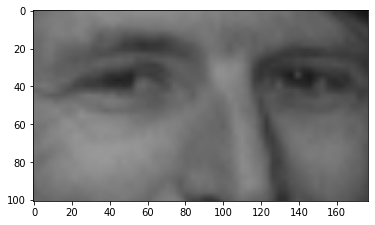

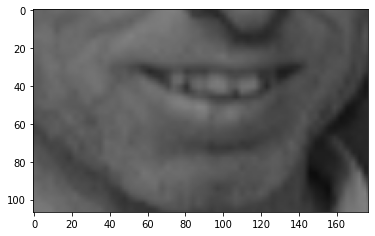

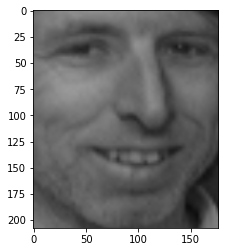

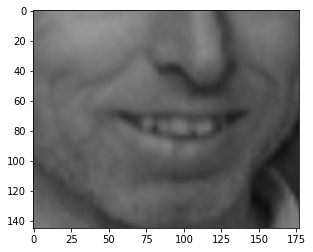

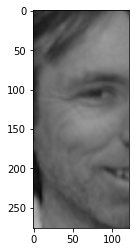

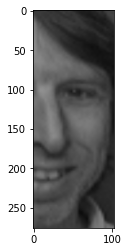

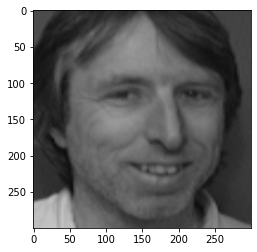

/content/drive/MyDrive/data/facesTrimmed/Training/s39/9.png


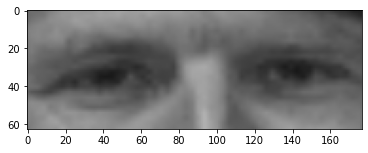

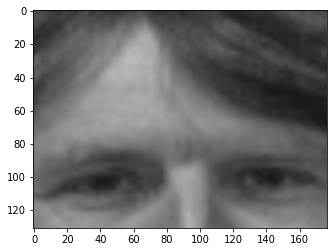

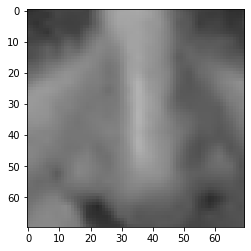

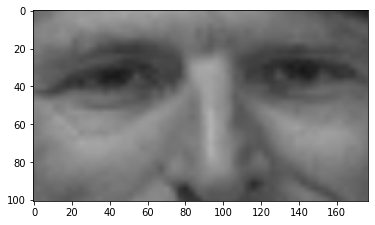

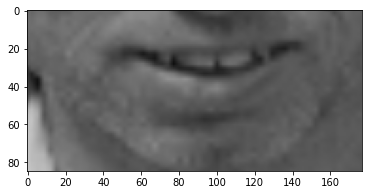

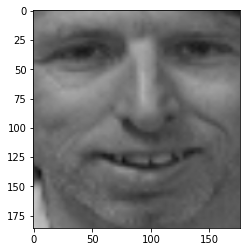

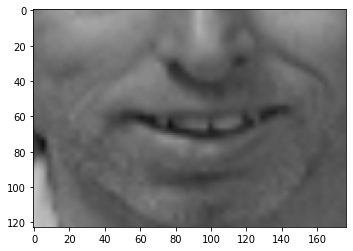

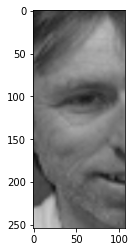

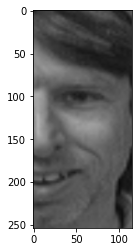

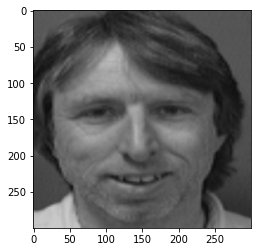

/content/drive/MyDrive/data/facesTrimmed/Training/s39/8.png


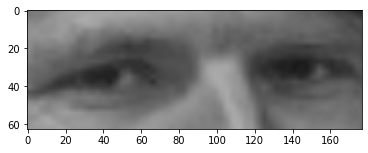

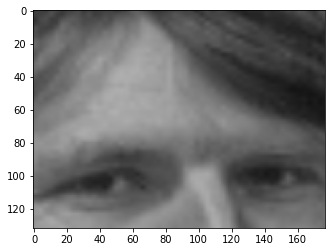

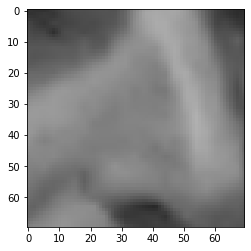

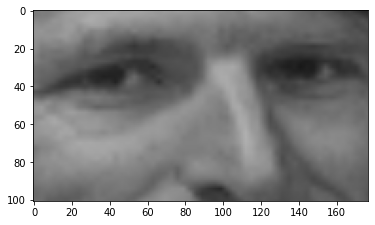

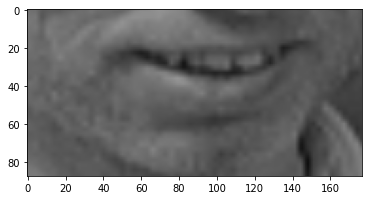

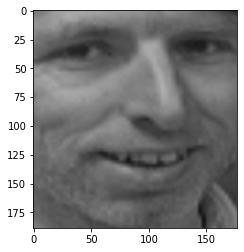

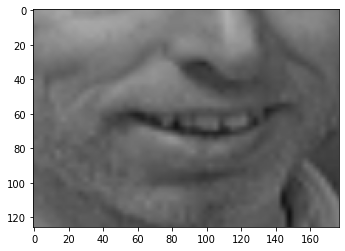

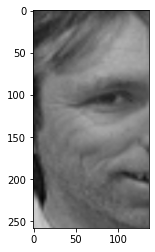

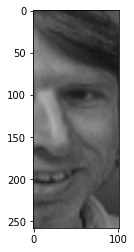

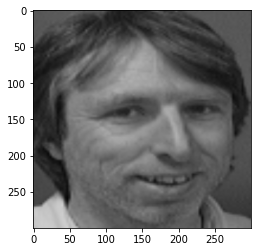

/content/drive/MyDrive/data/facesTrimmed/Training/s39/6.png


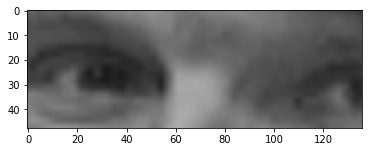

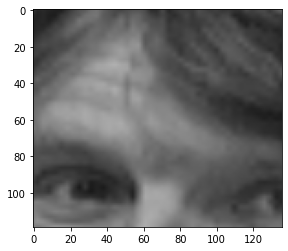

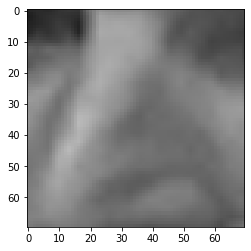

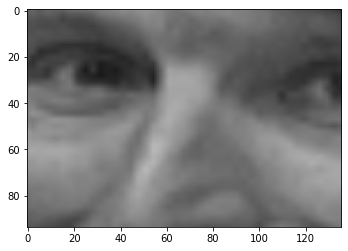

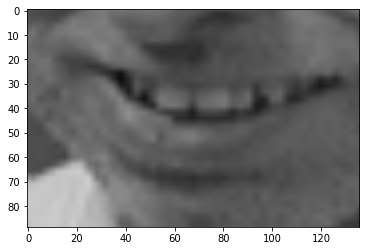

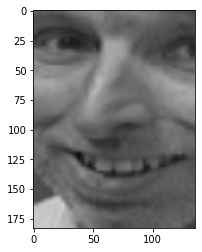

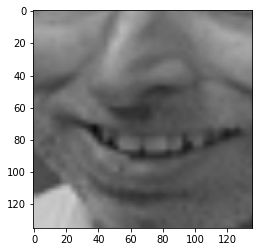

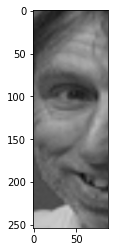

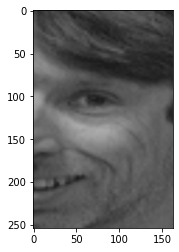

In [ ]:
personFolders = os.listdir("/content/drive/MyDrive/data/facesTrimmed/Training/")
#personFolders = os.listdir("/content/drive/MyDrive/data/facesTrimmed/Testing/")
c=0;
for personFolder in personFolders:
  imageNames = os.listdir("/content/drive/MyDrive/data/facesTrimmed/Training/"+personFolder+"/")
  for imageName in imageNames:
    f = "/content/drive/MyDrive/data/facesTrimmed/Training/"+personFolder+"/"+imageName
    c+=1
    print(f)
    img = cv2.imread(f)
    img = cv2.resize(img, (300, 300))
    getAndStorePatches(img, imageName, personFolder)
    plt.imshow(img, cmap='gray')
    plt.show()
print(c)